In [ ]:
import pandas as pd

In [ ]:
#Creamos la variable datos_consumo para cargar el archivo con la función read_excel de la librería Pandas:
datos_consumo = pd.read_excel('datos1.xlsx')

In [ ]:
#Usamos la función head() para comprobar que los datos se cargaron correctemente en el dataframe viendo los primeros 5 registros:
datos_consumo.head(5)

,Fecha (dd/mm/aa),Momento,Nombre alimento,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg),Fuente
0,2022-08-18,desayno,capuccino,74,5.81,3.98,5.08,50,https://www.fatsecret.com.mx/calor%C3%ADas-nut...
1,2022-08-18,snack,fresas con chamoy,56,14.00,0.00,0.00,2,https://www.fatsecret.com.mx/calor%C3%ADas-nut...
2,2022-08-18,comida,2 tacos de pollo y brocoli,400,16.60,0.00,0.96,98,https://www.fatsecret.com.mx/calor%C3%ADas-nut...
3,2022-08-18,cena,quesadillas,225,22.35,0.00,10.00,409,https://www.fatsecret.com.mx/calor%C3%ADas-nut...
4,2022-08-19,desayuno,latte helado,99,17.00,0.00,1.00,30,https://www.fatsecret.com.mx/calor%C3%ADas-nut...


In [ ]:
# Reemplazar cadenas incorrectas
datos_consumo['Momento'] = datos_consumo['Momento'].replace({'desayno ': 'desayuno', 'cena ': 'cena'})

# Seleccionar columnas de interés y eliminar filas con valores nulos
datos_consumo = datos_consumo[['Carbohidratos (g)', 'Lípidos/grasas (g)', 'Proteína (g)', 'Sodio (mg)', 'Calorías (kcal)']].dropna()

# Asignar variables independientes (X) y dependiente (y)
X = datos_consumo[['Carbohidratos (g)', 'Lípidos/grasas (g)', 'Proteína (g)', 'Sodio (mg)']]
y = datos_consumo['Calorías (kcal)']



In [ ]:
import statsmodels.api as sm

# Crear el modelo de regresión lineal
modelo_regresion = sm.OLS(y, X).fit()


In [ ]:
# Imprimir el resumen del modelo
print(modelo_regresion.summary())

                                 OLS Regression Results                                
Dep. Variable:        Calorías (kcal)   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              2564.
Date:                Wed, 28 Feb 2024   Prob (F-statistic):                   2.18e-229
Time:                        19:32:07   Log-Likelihood:                         -1599.1
No. Observations:                 302   AIC:                                      3206.
Df Residuals:                     298   BIC:                                      3221.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [ ]:
# Recorrer los coeficientes del modelo y seleccionar variables con valor p < 0.05
variables_significativas = [variable for variable, p_valor in zip(X.columns, modelo_regresion.pvalues) if p_valor < 0.05]

In [ ]:
# Crear un nuevo conjunto de datos con variables significativas
X_seleccionado = X[variables_significativas]

In [ ]:
# Ajustar un nuevo modelo de regresión lineal con las variables seleccionadas
modelo_regresion_significativo = sm.OLS(y, X_seleccionado).fit()


In [ ]:
# Imprimir el resumen del nuevo modelo
print(modelo_regresion_significativo.summary())

                                 OLS Regression Results                                
Dep. Variable:        Calorías (kcal)   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              3429.
Date:                Wed, 28 Feb 2024   Prob (F-statistic):                   3.58e-231
Time:                        19:32:39   Log-Likelihood:                         -1599.2
No. Observations:                 302   AIC:                                      3204.
Df Residuals:                     299   BIC:                                      3215.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [ ]:
# Calcular la suma de los residuos
suma_residuos = sum(modelo_regresion_significativo.resid)

# Verificar que la suma de los residuos sea cercana a cero
print("Suma de residuos:", suma_residuos)

Suma de residuos: 1384.886398457492


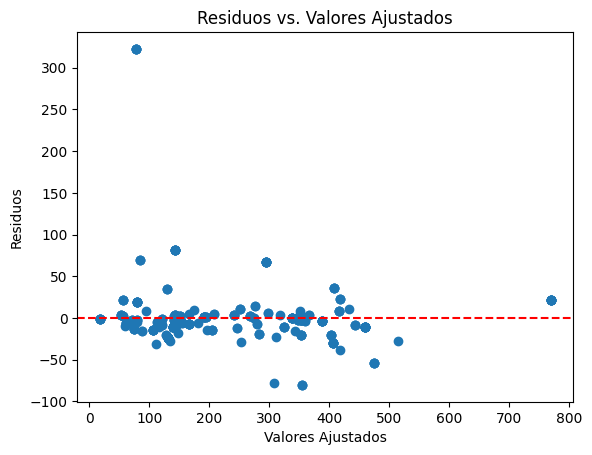

In [ ]:
import matplotlib.pyplot as plt

# Graficar los residuos
plt.scatter(modelo_regresion_significativo.fittedvalues, modelo_regresion_significativo.resid)
plt.axhline(y=0, color='r', linestyle='--')  # Línea horizontal en y=0
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs. Valores Ajustados')
plt.show()
